# Example 1. PLA with Scikit-learn 
---
### Pretest
#### 1\. Import Iris datasets and modules

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()
#print iris

#### 2\. Split data

In [3]:
X = iris.data[:, [2,3]]
y = iris.target
np.unique(y)

array([0, 1, 2])

In [4]:
# See https://github.com/udacity/machine-learning/issues/202
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0 )

#### 3\. Standardization with Sklearn 

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### 4\. Use Perceptron

In [8]:
from sklearn.linear_model import Perceptron

In [9]:
ppn = Perceptron(n_iter=40, eta0=0.1, random_state=0, verbose=0)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, eta0=0.1, fit_intercept=True,
      n_iter=40, n_jobs=1, penalty=None, random_state=0, shuffle=True,
      verbose=0, warm_start=False)

In [10]:
y_pred = ppn.predict(X_test_std)
print 'Misclassified sample: %d'%( (y_test != y_pred).sum() )

Misclassified sample: 4


In [11]:
#help(Perceptron)
#ppn.get_params()

In [12]:
from sklearn.metrics import accuracy_score
print 'Accuracy: %f' % accuracy_score(y_test, y_pred)
print 'Accuracy: %f' % ppn.score(X_test_std, y_test)

Accuracy: 0.911111
Accuracy: 0.911111


In [13]:
# W1, W2 for X1, X2 for 3 class
ppn.coef_

array([[-0.14874662, -0.11229737],
       [ 0.22431308, -0.20230671],
       [ 0.50351128,  0.28717266]])

In [14]:
# W0 for 3 class
ppn.intercept_

array([-0.1, -0.1, -0.5])

#### 5\. Plot decision regions

In [15]:
from plot_decision_regions import plot_decision_regions
import matplotlib.pyplot as plt

In [16]:
X_combined_std = np.vstack( (X_train_std, X_test_std) )
y_combined = np.hstack( (y_train, y_test) )

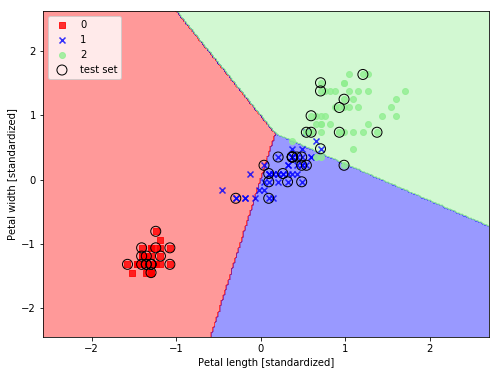

In [17]:
plt.figure(figsize=(8, 6))
plot_decision_regions( X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150) )
plt.xlabel('Petal length [standardized]')
plt.ylabel('Petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

---
### Shuffle data for generating hypotheses

Generating....


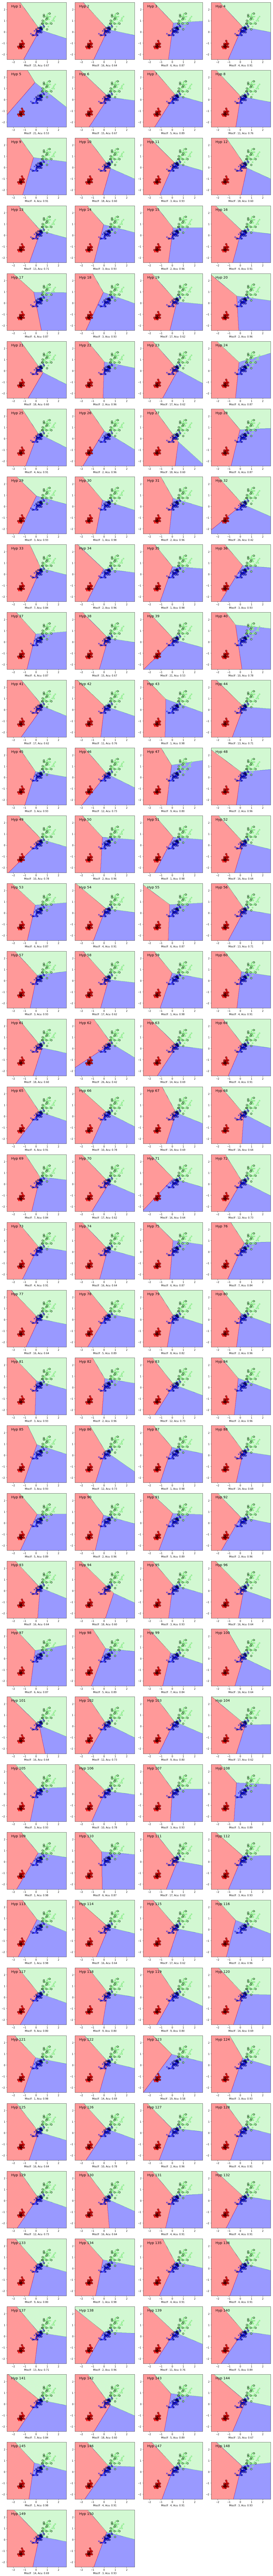

In [18]:
ppns = []
n_hyps = 150
n_iter = 20
eta0 = 0.1
cplot = 4
r = int(n_hyps/cplot)
fig = plt.figure(figsize=(16, n_hyps))
print 'Generating....'
for h in range(n_hyps):
    ppn_ = Perceptron(n_iter=n_iter, eta0=eta0, random_state=h)
    ppn_.fit(X_train_std, y_train)
    ppns.append(ppn_) 
    
    y_pred_ = ppn_.predict(X_test_std)
    
    fig.add_subplot(r if n_hyps%cplot is 0 else r+1, cplot, h+1)
    plot_decision_regions( X=X_combined_std, y=y_combined, classifier=ppn_, test_idx=range(105,150), highlightSize=55 )
    plt.text(-2.2, 2.2, 'Hyp '+str(h+1), fontsize='x-large')
    plt.xlabel('Misclf : %d, Acu: %.2f'%( (y_test != y_pred_).sum(), ppn_.score(X_test_std, y_test) ) )
plt.tight_layout()
plt.show()